# WASP-119

In this notebook, we use *eleanor* to get the raw, corrected and PCA light curves for a target named WASP-119. The target is located in the constellation of Reticulum (where WASP-100 is also located). We use the target's name to download all the required information with *eleanor* for TESS's Sector 1.

WASP-119 has been confirmed to have an exoplanet in both DACE and the NASA Exoplanet Catalog.


**DACE:** https://dace.unige.ch/dashboard/

**NASA Exoplanet Catalog:** https://exoplanets.nasa.gov/discovery/exoplanet-catalog/

In [ ]:
# Connect to Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the *eleanor* pipeline. We need to install every time the notebook gets disconnected from the Google Drive.

In [ ]:
pip install eleanor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00
  Created wheel for eleanor: filename=eleanor-2.0.5-py2.py3-none-any.whl size=144466 sha256=2a8908974692631f96478fce07443998a5f7c386c54710d24d324f3b77ec7

In [ ]:
# Import "Image" class to display images in the notebook.
from IPython.display import Image

# Instruct Python to ignore and not display warning messages.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the necessary modules.
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

plt.rcParams['font.size'] = 16   # Set the font size for text.

## Initiating *eleanor.Source*

Choosing the target star and the sector it was observed in. Here we used the coordinates for WASP-119, in Sector 1.

In [ ]:
star = eleanor.Source(name='WASP-119', sector=1)

Most recent sector available =  69
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  1...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  1 now available.


Now that everything has been downloaded, we can check the different ID numbers (TIC and Gaia) and coordinates (RA and Dec) from the

cross-checking eleanor has done.

In [ ]:
star.tic, star.coords, star.gaia

(388104525, (55.93342166666667, -65.19385083333334), 4672607178880426624)

We can also get information on where the target was observed on the TESS CCD cameras.

In [ ]:
star.sector, star.camera, star.chip

(1, 4, 1)

## Making a light curve

We now have everything we need to make a light curve.

In [ ]:
# Creating a PCA light curve for the target star.
data = eleanor.TargetData(star, do_pca=True)

The eleanor light curves are tailored to find transits. So, it's trying to minimise the combined differential photometric precision (noise out of transit). We can do three different background subtractions:

1. 1D postcard background: constant value that is calculated for each postcard frame, masking all the stars in that region.
  - data.bkg_type = 'PC_LEVEL' : keyword = data.flux_bkg
2. 1D TPF (target pixel file) background: constant value calculated for each TPF frame, masking all the stars in that region.
  - 1D TPF background : data.bkg_type = 'TPF_LEVEL' : keyword = data.tpf_flux_bkg
3. 2D background: a model background that the developers created and was downloaded when we created the *eleanor.Source* object.
  - data.bkg_type = 'TPF_2D_LEVEL' : keyword = data.bkg_tpf (post_obj.background2d)


An example of a 2D background is shown in the plot below.

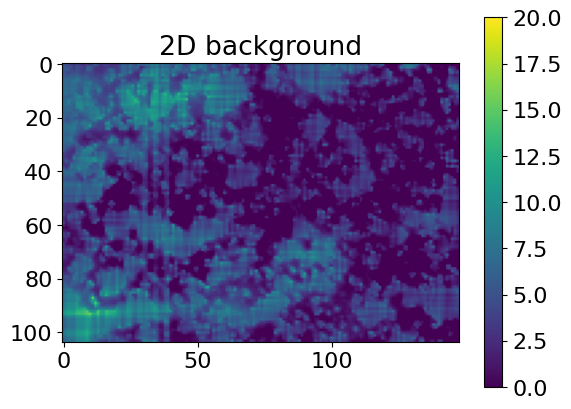

In [ ]:
plt.title('2D background')
plt.imshow(data.post_obj.background2d[100], vmin=0, vmax=20)
plt.colorbar();

There are a lot of stars in this field and we can see the bright regions used for background subtraction.

Below we can see which background produced the best light curve. The result is "PC_LEVEL", meaning that the 1D level background removed the most systematics.


In [ ]:
data.bkg_type

'PC_LEVEL'

Below we plot the background flux (energy received per unit area) over time (BJD).



---


**BJD:** Barycentric Julian Date, the Julian Date corrected for differences in the Earth's position with respect to the barycentre of the Solar System. Due to the finite speed of light, the time an astronomical event is observed depends on the changing position of the observer in the Solar System. Before multiple observations can be combined, they must be reduced to a common, fixed, reference location. This correction also depends on the direction to the object or event being timed.

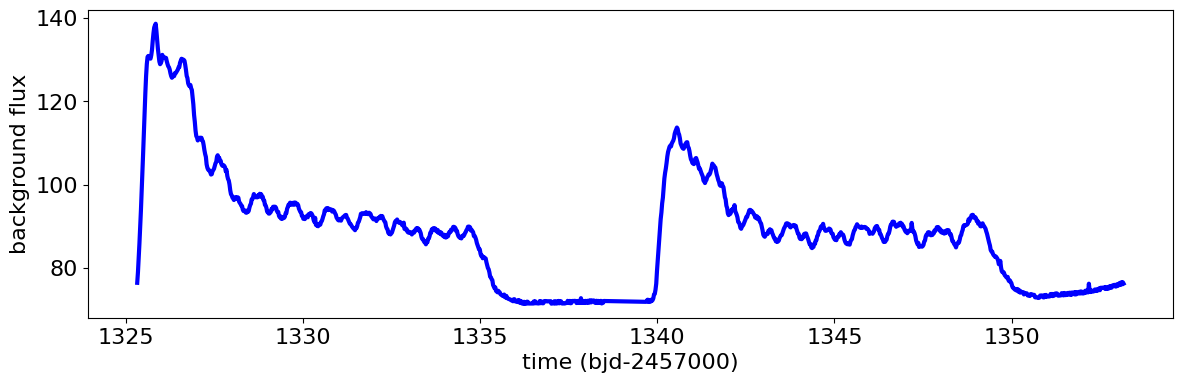

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(data.time, data.post_obj.bkg, 'b', lw=3)        # Changed the line colour from 'w' to 'b' to see it.
plt.xlabel('time (bjd-2457000)')
plt.ylabel('background flux');

*eleanor* also tests an entire suite of apertures. The aperture selected by *eleanor* also minimises CDPP. So, by testing all the different apertures with the different backgrounds, we hope to get the cleanest light curve for transits as possible. The aperture over the selected target is shown below.

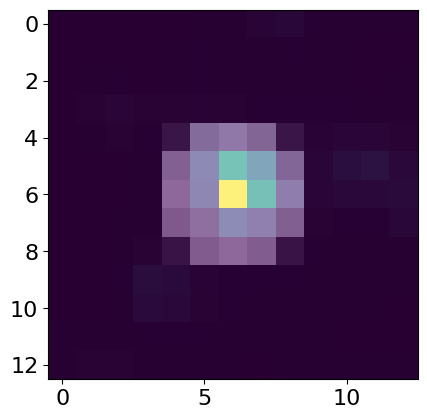

In [ ]:
plt.imshow(data.tpf[100])
plt.imshow(data.aperture, alpha=0.4, cmap='Greys_r');

The brighter/more yellow areas show the location of the star. The further away we get from the star the less energy we can receive from those areas.

We can also use the *eleanor.Visualise* class. We pass in the data from the *eleanor.TargetData* object and can overplot the contour, set colours, etc.

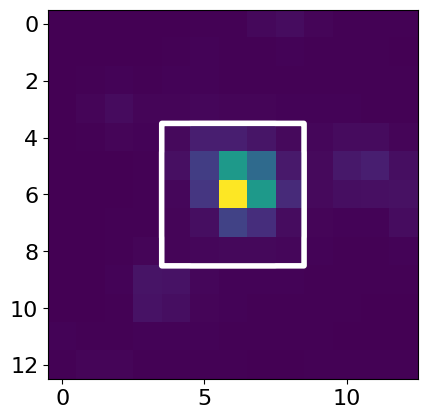

In [ ]:
vis = eleanor.Visualize(data)
fig = vis.aperture_contour()
plt.gca().invert_yaxis()

## Plotting the light curve

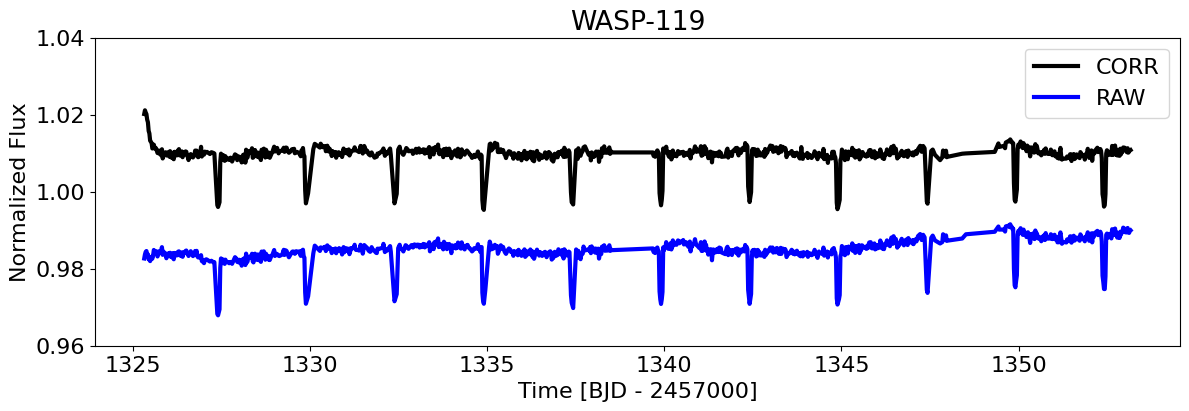

In [ ]:
q = data.quality == 0         # Mask bad cadences with the quality flags set by the developers.

plt.figure(figsize=(14,4))    # Set figure size.

#plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.005, 'b', lw=3, label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.01, 'k', lw=3, label='CORR')

# Moved this line of code from the top to get a more consistent legend.
plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.015, 'b', lw=3, label='RAW')

plt.ylim(0.96, 1.04)               # This line is used in the tutorial. It just changes the limits of the y-axis.
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-119')
plt.legend();

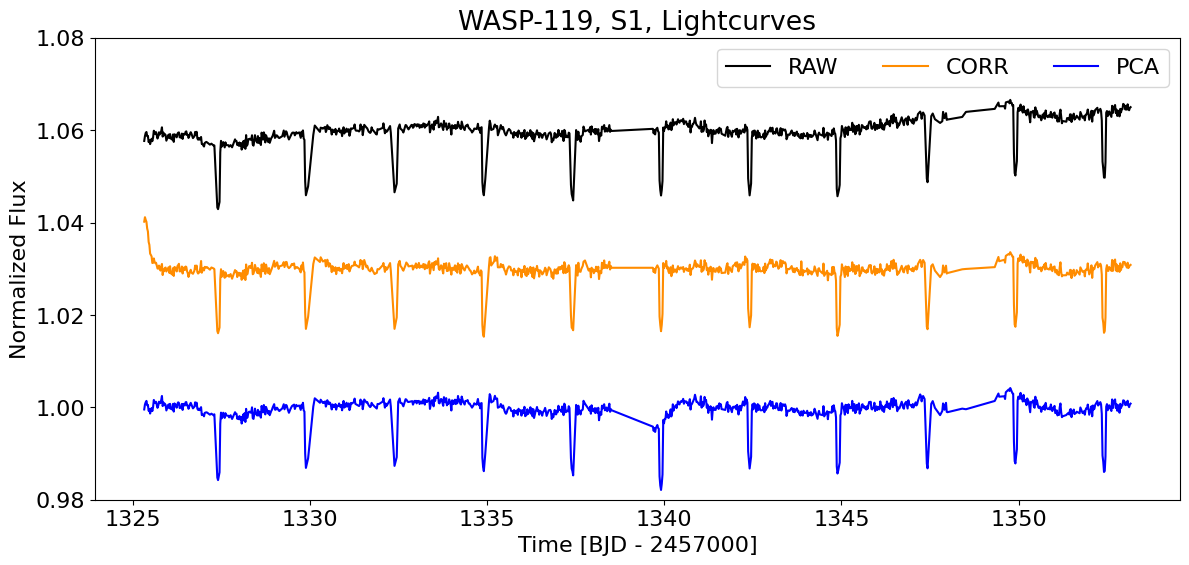

In [ ]:
q = data.quality == 0         # Mask bad cadences witht he quality flags det by the developers.

plt.figure(figsize=(14,6))    # Set figure size.

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) + 0.06, 'k', label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'darkorange', label='CORR')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'b', label='PCA')
#plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylim(0.98, 1.08)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-119, S1, Lightcurves')
#plt.legend(loc='best');
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.legend(ncol=3);

By calling *eleanor.to_lightkurve()*, we will get a *lightkurve.LightCurve* object. We can specify which flux we want passed into the object.

This is also used to download the light curves from the TASOC and Oelkers & Stassun pipelines, for comparison.


In [ ]:
lc = data.to_lightkurve(flux=data.corr_flux)

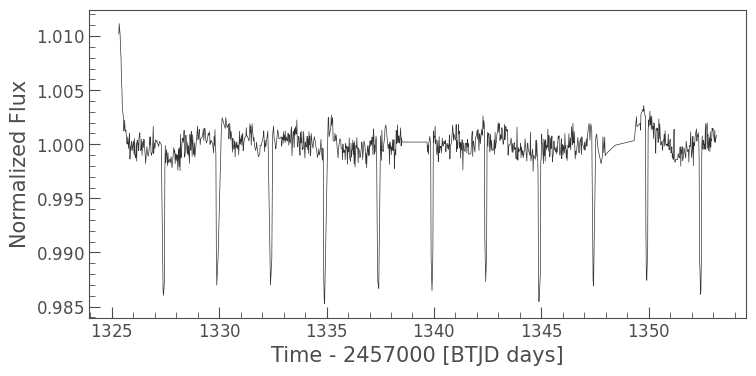

In [ ]:
lc.normalize().plot();

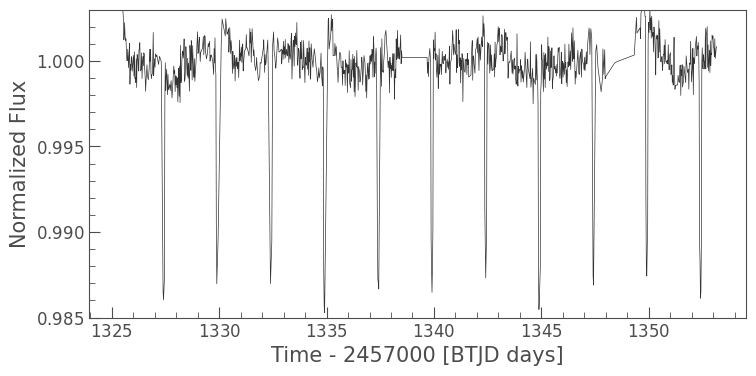

In [ ]:
# Setting limits to the y-axis.
lc.normalize().plot()
plt.ylim(0.985, 1.003);

## Crossmatching

Within *eleanor*, we also have tools to see if our target has a light curve produced by the TASOC team (TESS Asteroseismic Consortium), Oelkers & Stassun difference imaging pipeline, or was observed at a 2-minute cadence.

In [ ]:
crossmatch = eleanor.Crossmatch(data)

To check for 2-minute data, we use *lightkurve* behind the scenes.

In [ ]:
crossmatch.two_minute()

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,388104525,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,388104525,0.0


Because this returns a *lightkurve.SearchResult* object, we can download the data product right from there and go about using the other *lightkurve* tools.


---

To check out the TASOC pipeline, we use *astro query* behind the scenes to get the data products from MAST (Mikulski Archive for Space Telescopes) and plot the light curve. They have their own quality flags so we can use those.

In [ ]:
crossmatch.tasoc_lc()

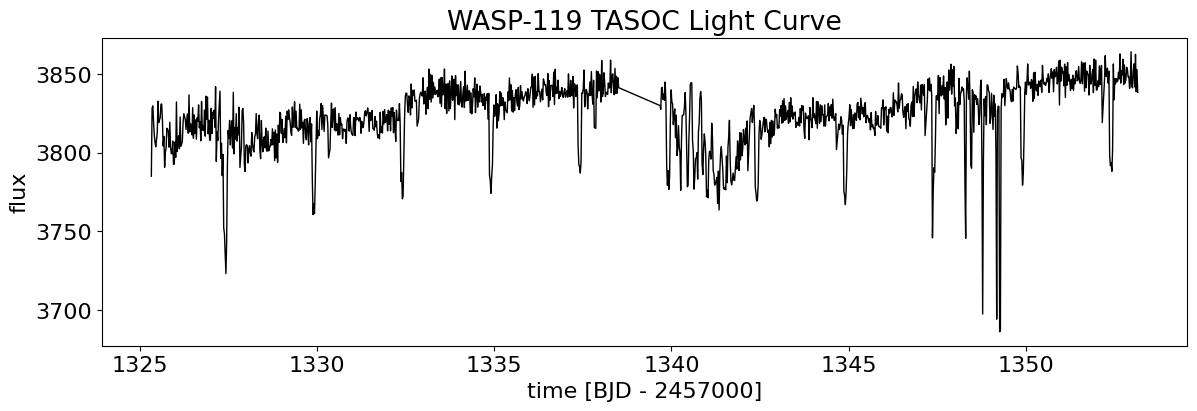

In [ ]:
plt.figure(figsize=(14,4))
q = crossmatch.tasoc_pixel_quality == 0      # Can use TASOC quality flags.
plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q], 'k', lw=1)
# plt.ylim(13300,13600)
plt.title('WASP-119 TASOC Light Curve')
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('flux');

This particular light curve seems to include a lot of noise. However, the transits are clearly visible. There is also a feature right before time=1350, that appears in most TASOC light curves that we have downloaded. It is possible that the feature is the result of an issue that may have occured with the TESS satellite at that particular date.

Then we check the Oelkers & Stassun light curves (it should be noted these light curves are in magnitudes, which is why they look

upside-down).

In [ ]:
crossmatch.oelkers_lc()

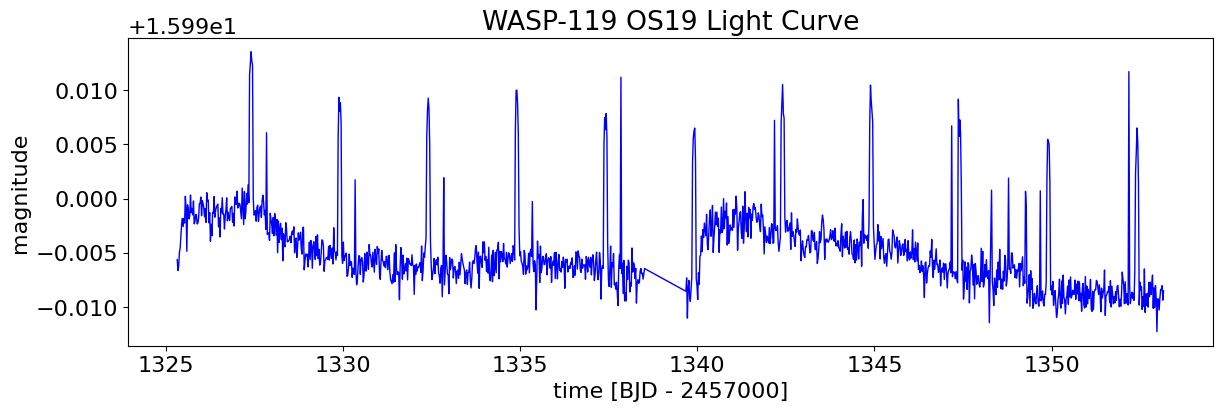

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(crossmatch.os_time, crossmatch.os_mag, 'b', lw=1)
plt.title('WASP-119 OS19 Light Curve')
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('magnitude');

## Comparison plot

We can now plot all light curves together and compare.


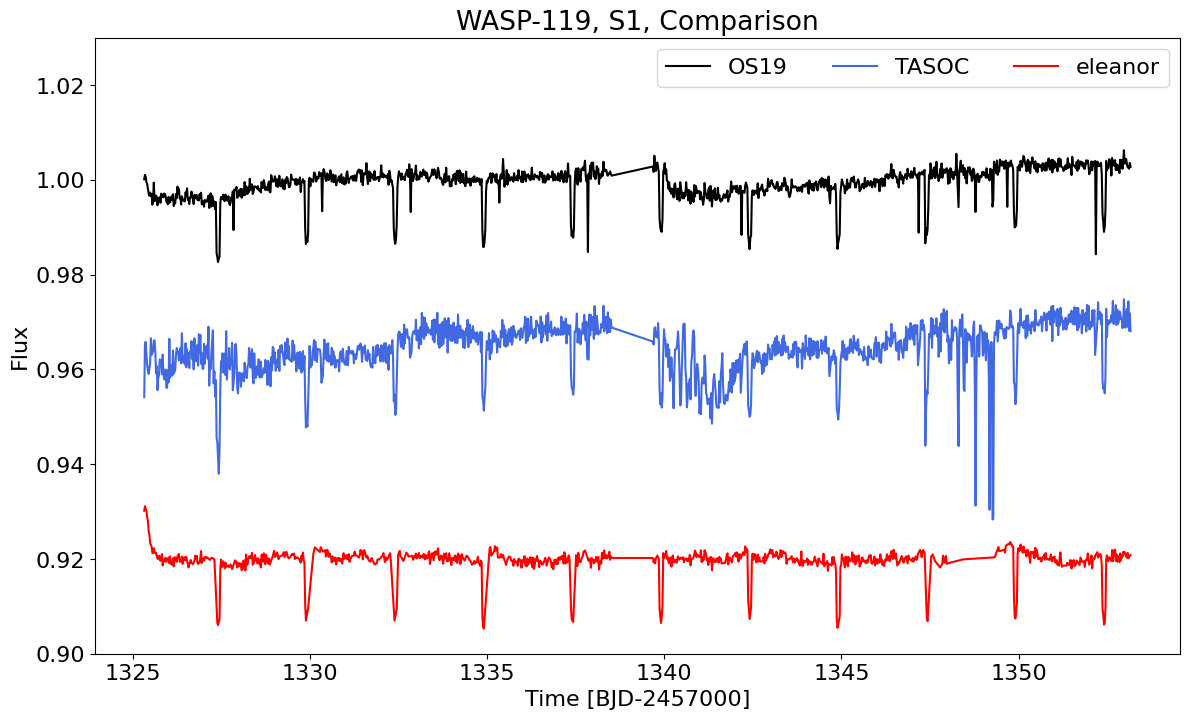

In [ ]:
plt.figure(figsize=(14,8))

e = data.quality == 0

plt.plot(crossmatch.os_time, 10**(-0.4*crossmatch.os_mag)/np.nanmedian(10**(-0.4*crossmatch.os_mag)), 'k', label='OS19', lw=1.5)

plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q]/np.nanmedian(crossmatch.tasoc_flux_raw[q])-0.035, 'royalblue', label='TASOC', lw=1.5)

plt.plot(data.time[e], data.corr_flux[e]/np.nanmedian(data.corr_flux[e])-0.08, 'red', label='eleanor', lw=1.5)

plt.legend(ncol=3)
plt.title('WASP-119, S1, Comparison')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Flux')
plt.ylim(0.9, 1.03);

Here we see that we get the same number of transits from all pipelines (11 dips) and they all happen on the same time coordinate. Most of the noise has been reduced in *eleanor* and the TASOC feature (at around time=1350) has been completely smoothed out.

This proves that *eleanor* can produce accurate light curves for WASP-119.